# Basic Operations (Low Level API)
---
In thie notebook, I'll describe basic Tensor operations.
- Vector / Matrix
- Matrix Operation

__packages:__

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)

tensorflow version:  1.12.0
numpy version:  1.15.2
matplotlib version:  3.0.0


## Vector / Matrix
We can use numpy like functions to create vectors or tensors.

### Numpy like functions
```python
tf.zeros(shape, dtype=tf.float32, name=None)
```
```python
tf.ones(shape, dtype=tf.float32, name=None)
```
```python
tf.zeros_like(tensor, dtype=None, name=None, optimize=True)
```
```python
tf.ones_like(tensor, dtype=None, name=None, optimize=True)
```
```python
tf.linspace(start, stop, num, name=None)
```
```python
tf.range(start, limit=None, delta=1, dtype=None, name='range')
```

In [2]:
data1 = tf.zeros([2,3])
data2 = tf.ones([2,3])
data3 = tf.zeros_like(data2)
data4 = tf.ones_like(data1)

with tf.Session() as sess:
    data1_sess = sess.run(data1)
    data2_sess = sess.run(data2)
    data3_sess = sess.run(data3)
    data4_sess = sess.run(data4)
    print("--- data1_sess ---")
    print(data1_sess)
    print("--- data2_sess ---")
    print(data2_sess)
    print("--- data3_sess ---")
    print(data3_sess)
    print("--- data4_sess ---")
    print(data4_sess)

--- data1_sess ---
[[0. 0. 0.]
 [0. 0. 0.]]
--- data2_sess ---
[[1. 1. 1.]
 [1. 1. 1.]]
--- data3_sess ---
[[0. 0. 0.]
 [0. 0. 0.]]
--- data4_sess ---
[[1. 1. 1.]
 [1. 1. 1.]]


### [tf.random](https://www.tensorflow.org/api_docs/python/tf/random) examples 
```python
tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
```
```python
tf.random.normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
```
```python
tf.random.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
```

C:\Users\yoshiyuki\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


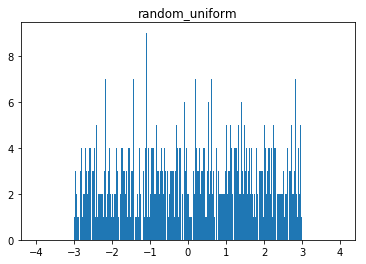

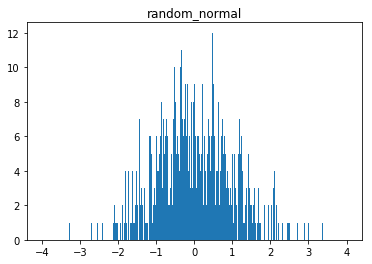

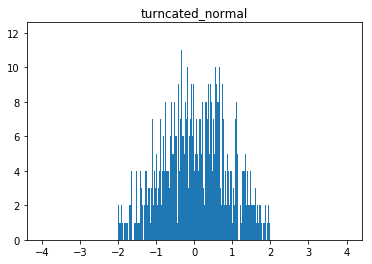

In [3]:
# clear graph
tf.reset_default_graph()

uniform = tf.random_uniform((1000, ), minval=-3, maxval=3)
normal = tf.random_normal((1000, ))
turncated_normal = tf.truncated_normal((1000, ))

with tf.Session() as sess:
    uniform_values = sess.run(uniform)
    normal_values = sess.run(normal)
    turncated_normal_values = sess.run(turncated_normal)

def plot(title, values, hist_range=(-4, 4)):
    plt.title(title)
    plt.hist(values, np.linspace(*hist_range, num=len(values)/2))
    plt.show()

plot("random_uniform", uniform_values)
plot("random_normal", normal_values)
plot("turncated_normal", turncated_normal_values)

```python
tf.random.shuffle(value, seed=None, name=None)
tf.random_shuffle(value, seed=None, name=None)
```
```python
tf.random.crop(value, size, seed=None, name=None)
tf.random_crop(value, size, seed=None, name=None)
```

In [4]:
# clear graph
tf.reset_default_graph()

val = tf.constant([1,2,3,4,5], dtype=tf.int32)
shuffle = tf.random_shuffle(val)
crop = tf.random_crop(val, (3,))

with tf.Session() as sess:
    print("original: ", sess.run(val))
    print("shuffle: ", sess.run(shuffle))
    print("crop: ", sess.run(crop))

original:  [1 2 3 4 5]
shuffle:  [2 3 1 5 4]
crop:  [1 2 3]


### Numpy to tensor
```python
tf.convert_to_tensor(value, dtype=None, name=None, preferred_dtype=None)
```
### Dimension operations
```python
# Removes dimensions of size 1 from the shape of a tensor. 
tf.squeeze(input, axis=None, name=None, squeeze_dims=None)
```
```python
# Inserts a dimension of 1 into a tensor's shape. (deprecated arguments)
tf.expand_dims(input, axis=None, name=None, dim=None)
```

In [5]:
# clear graph
tf.reset_default_graph()

np_array1 = np.array([[1,2,3,4],[5,6,7,8]])
np_array2 = np.array([[[1,2,3,4],[5,6,7,8]]])

val1 = tf.convert_to_tensor(np_array1)
val2 = tf.convert_to_tensor(np_array2)
print("val1 shape: ", np_array1.shape)
print("val2 shape: ", np_array2.shape)

squeeze = tf.squeeze(val2)
expand = tf.expand_dims(val1, axis=0)

with tf.Session() as sess:
    print("val1:\n", sess.run(val1))
    print("val2:\n", sess.run(val2))
    print("squeeze(val2)\n", sess.run(squeeze))
    print("expand_dims(val1)\n", sess.run(expand))

val1 shape:  (2, 4)
val2 shape:  (1, 2, 4)
val1:
 [[1 2 3 4]
 [5 6 7 8]]
val2:
 [[[1 2 3 4]
  [5 6 7 8]]]
squeeze(val2)
 [[1 2 3 4]
 [5 6 7 8]]
expand_dims(val1)
 [[[1 2 3 4]
  [5 6 7 8]]]


## Matrix Operation

In [6]:
A_mat_tsr = tf.constant([[1,2,3],[4,5,6]])
B_mat_tsr = tf.constant([[7,8,9],[10,11,12]])
C_mat_tsr = tf.constant([[1,2],[3,4],[5,6]])

### Add -- element wise operation

In [7]:
with tf.Session() as sess:
    output = sess.run(A_mat_tsr + B_mat_tsr)
    print(output)

[[ 8 10 12]
 [14 16 18]]


### Subtract -- element wise operation

In [8]:
add_matrix = tf.add(A_mat_tsr, B_mat_tsr)
with tf.Session() as sess:
    output = sess.run(add_matrix)
    print(output)

[[ 8 10 12]
 [14 16 18]]


### Multiply -- element wise operation

In [9]:
div_matrix = tf.divide(A_mat_tsr, B_mat_tsr)
with tf.Session() as sess:
    output = sess.run(div_matrix)
    print(output)

[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]]


### Divide -- element wise operation

In [10]:
div_matrix = tf.divide(A_mat_tsr, B_mat_tsr)
with tf.Session() as sess:
    output = sess.run(div_matrix)
    print(output)

[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]]


### Matrix multiplication

In [11]:
matrix_dot = tf.matmul(A_mat_tsr,C_mat_tsr)
with tf.Session() as sess:
    output = sess.run(matrix_dot)
    print(output)

[[22 28]
 [49 64]]
